In [18]:
import requests
import base64

In [19]:
subscription_key = "07ecc20b5e0f4c01b3b62196a116fee6"
face_api_url = 'https://westus.api.cognitive.microsoft.com/face/v1.0/detect'
image_url = 'https://how-old.net/Images/faces2/main007.jpg'
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}



In [20]:
f = open('123.jpg','rb') 
my_data=base64.b64encode(f.read()) #读取文件内容，转换为base64编码 
f.close()

In [30]:
response = requests.post(face_api_url, params=params, headers=headers, json={"url": "123.jpg"})
response2 = requests.post(face_api_url, params=params, headers=headers, data = my_data)


In [31]:
faces = response.json()
print(faces)

{'error': {'code': 'InvalidURL', 'message': 'Invalid image URL.'}}


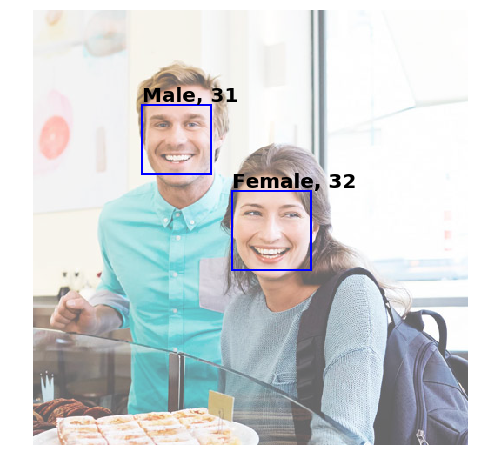

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

TypeError: the JSON object must be str, bytes or bytearray, not 'list'